In [17]:
!pip uninstall nltk

^C


In [ ]:
#https://stackabuse.com/python-for-nlp-movie-sentiment-analysis-using-deep-learning-in-keras/ --use nerual network

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder

In [20]:
import nltk

AttributeError: partially initialized module 'nltk' has no attribute 'data' (most likely due to a circular import)

In [6]:
data=pd.read_csv('tweets.csv')

In [7]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

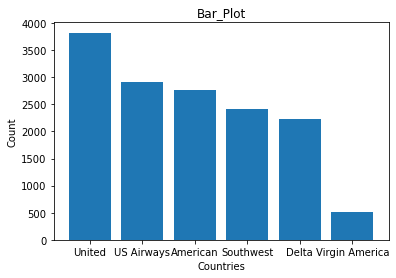

In [9]:
ct_airline=dict(data.airline.value_counts())
plt.bar(ct_airline.keys(),ct_airline.values())
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Bar_Plot')
plt.show()

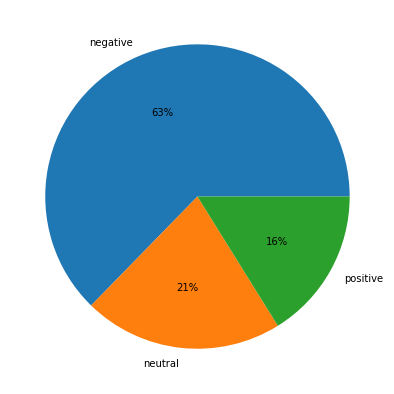

In [10]:
ct_tweets=dict(data.airline_sentiment.value_counts())
#col=list(ct_tweets.keys)
plt.figure(figsize=(7,7))
plt.pie(ct_tweets.values(),labels=list(ct_tweets.keys()),autopct='%1.0f%%')
plt.show()

<Figure size 720x720 with 0 Axes>

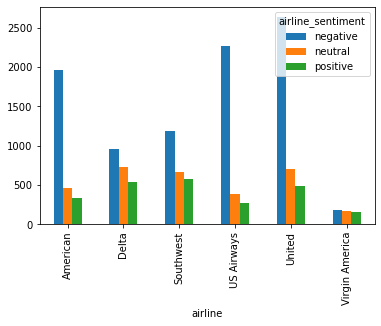

In [28]:
label_encoder = LabelEncoder()
data['airline_sentiment']= label_encoder.fit_transform(data['airline_sentiment'])
data['airline_sentiment'][:10]

0    1
1    2
2    1
3    0
4    0
5    0
6    2
7    1
8    2
9    2
Name: airline_sentiment, dtype: int64

In [24]:
import numpy as np
target=data.iloc[:,1].values
features=data.iloc[:,10].values

In [25]:
target

array([1, 2, 1, ..., 1, 0, 1])

In [29]:
#Presprocessing of feature
new_feature=[]
for i in features:
    feature=re.sub(r'\W', ' ',i) #replace special characters like !,',#
    feature=re.sub(r'\s+[a-zA-Z]\s+', ' ', feature) #Replace single character with space
    feature=re.sub(r'\s+', ' ', feature, flags=re.I)#replace multiple space with single space
    feature=feature.lower()
    new_feature.append(feature)
new_feature


[' virginamerica what dhepburn said ',
 ' virginamerica plus you ve added commercials to the experience tacky ',
 ' virginamerica didn today must mean need to take another trip ',
 ' virginamerica it really aggressive to blast obnoxious entertainment in your guests faces amp they have little recourse',
 ' virginamerica and it a really big bad thing about it',
 ' virginamerica seriously would pay 30 flight for seats that didn have this playing it really the only bad thing about flying va',
 ' virginamerica yes nearly every time fly vx this ear worm won go away ',
 ' virginamerica really missed prime opportunity for men without hats parody there https co mwpg7grezp',
 ' virginamerica well didn but now do d',
 ' virginamerica it was amazing and arrived an hour early you re too good to me ',
 ' virginamerica did you know that suicide is the second leading cause of death among teens 10 24',
 ' virginamerica lt 3 pretty graphics so much better than minimal iconography d',
 ' virginamerica th

In [13]:
#Feature extraction
#Tf-idf
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features = vectorizer.fit_transform(new_feature).toarray()

In [14]:
processed_features

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt
X_train, X_test, y_train, y_test = train_test_split(processed_features, target, test_size=0.2)
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))
print(X_train.shape,y_train.shape)

11712 11712
2928 2928
(11712, 2301) (11712,)


In [16]:
y_test

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [17]:
from sklearn.linear_model import LogisticRegression 
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LR_data=pd.DataFrame([y_test,y_pred])
LR_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,0,1,2,3,4,5,6,7,8,9,...,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927
0,negative,negative,negative,negative,neutral,negative,negative,negative,negative,negative,...,neutral,negative,positive,negative,neutral,negative,positive,negative,negative,negative
1,negative,negative,negative,negative,negative,negative,negative,negative,negative,negative,...,negative,negative,positive,negative,neutral,negative,positive,negative,negative,negative


In [18]:
print(mt.accuracy_score(y_test,y_pred))
print(mt.precision_score(y_test,y_pred,average='weighted'))
print(mt.confusion_matrix(y_pred,y_test))
print(mt.classification_report(y_test,y_pred))


0.7844945355191257
0.7751900184938461
[[1756  305  126]
 [  81  271   58]
 [  24   37  270]]
              precision    recall  f1-score   support

    negative       0.80      0.94      0.87      1861
     neutral       0.66      0.44      0.53       613
    positive       0.82      0.59      0.69       454

    accuracy                           0.78      2928
   macro avg       0.76      0.66      0.70      2928
weighted avg       0.78      0.78      0.77      2928



In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)


In [20]:
knn_data=pd.DataFrame([y_test,y_pred_knn])
knn_data

,0,1,2,3,4,5,6,7,8,9,...,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927
0,negative,negative,negative,negative,neutral,negative,negative,negative,negative,negative,...,neutral,negative,positive,negative,neutral,negative,positive,negative,negative,negative
1,negative,negative,negative,negative,negative,negative,negative,negative,negative,positive,...,neutral,negative,neutral,positive,neutral,negative,negative,negative,negative,negative


In [21]:
print(mt.accuracy_score(y_test,y_pred_knn))
print(mt.precision_score(y_test,y_pred_knn,average='weighted'))
print(mt.confusion_matrix(y_pred_knn,y_test))
print(mt.classification_report(y_test,y_pred_knn))


0.673155737704918
0.6732736101985607
[[1545  300  156]
 [ 269  275  147]
 [  47   38  151]]
              precision    recall  f1-score   support

    negative       0.77      0.83      0.80      1861
     neutral       0.40      0.45      0.42       613
    positive       0.64      0.33      0.44       454

    accuracy                           0.67      2928
   macro avg       0.60      0.54      0.55      2928
weighted avg       0.67      0.67      0.66      2928



In [24]:
from sklearn.naive_bayes import 
nb=GaussianNB()
nb.fit(X_train,y_train)
NB_y_pred=nb.predict(X_test)
NB_data=pd.DataFrame([y_test,NB_y_pred])
NB_data

,0,1,2,3,4,5,6,7,8,9,...,2918,2919,2920,2921,2922,2923,2924,2925,2926,2927
0,negative,negative,negative,negative,neutral,negative,negative,negative,negative,negative,...,neutral,negative,positive,negative,neutral,negative,positive,negative,negative,negative
1,neutral,negative,negative,neutral,positive,negative,positive,neutral,neutral,positive,...,negative,positive,positive,positive,positive,negative,positive,positive,neutral,positive


In [26]:
print(mt.accuracy_score(y_test,NB_y_pred))
print(mt.precision_score(y_test,NB_y_pred,average='weighted'))
print(mt.confusion_matrix(NB_y_pred,y_test))
print(mt.classification_report(y_test,NB_y_pred))

0.4105191256830601
0.6444707689160158
[[654  68  33]
 [447 183  56]
 [760 362 365]]
              precision    recall  f1-score   support

    negative       0.87      0.35      0.50      1861
     neutral       0.27      0.30      0.28       613
    positive       0.25      0.80      0.38       454

    accuracy                           0.41      2928
   macro avg       0.46      0.48      0.39      2928
weighted avg       0.64      0.41      0.44      2928

